In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

При подготовке использовались следующие материалы:
* [Открытый курс машинного обучения. Тема 4. Линейные модели классификации и регрессии.](https://habrahabr.ru/company/ods/blog/323890/#1-lineynaya-regressiya)
* [Базовые принципы машинного обучения на примере линейной регрессии.](https://habrahabr.ru/company/ods/blog/322076/)
* [Материалы курсы «Машинное обучение» на ФКН ВШЭ.](http://wiki.cs.hse.ru/%D0%9C%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%B5_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_1)
* [Python Machine Learning: Machine Learning and Deep Learning with Python, scikit-learn, and TensorFlow, 2nd Edition by Sebastian Raschka.](https://www.amazon.com/Python-Machine-Learning-scikit-learn-TensorFlow/dp/1787125939)
* [A Course of Econometrics by D.S.G. Pollock](https://www.le.ac.uk/users/dsgp1/COURSES/MESOMET/ECMETXT/mesmtric.htm)
* и многие другие...

## Теория регрессионного анализа
Модель из категории «обучение с учителем», устанавливающая связь между одним или несколькими независимыми признааками (предикторами) и завсимыми континуальным призаком. В линейной регрессии моделью зависимости является формула прямой линии.


### Простая линейная регрессия

Простая (одномерная) линейная регрессия (модель с одним предиктором) аппроксимируется всем известной со школы функцией прямой линии
$\Large y=kx+b$ с той лишь разницей, что теперь нужно добавить случайную ошибку $\epsilon$:
$$\Large y_i = \beta_0 + \beta_1 x_i + \epsilon_i$$
где
* $y_i$ — зависимая переменная (отклик)
* $x_i$ — известная константа (значение объясняющей переменной, измерянной в i-ом эксперименте)
* $\beta_0$, $\beta_1$ — параметры модели (свободный член и угловой коэффициент).
* $\epsilon_i$ — случайная ошибка

Графически она выглядит следующим образом:
<img src="img/one_dim_lin_reg.png" width="550">

### Множественная линейная регрессия
Для простоты примем, что $x_0 = 1$. Тогда в общем случае форма линейной регрессии выглядит следующим так:
$$\Large \begin{array}{rcl} \forall h \in \mathcal{H}, h\left(\vec{x}\right) = w_0 x_0 + w_1 x_1 + w_2 x_2 + \cdots + w_m x_m \\ = \sum_{i=0}^m w_i x_i = \vec{x}^T \vec{w} \end{array}$$

Пример графика для линейной регрессионной модели с двумя независимыми переменными:
<img src="img/two_dim_lin_reg.png" width="550">

In [1]:
import numpy as np

In [ ]:
np.transpose()

## Обучение линейной регрессии
### Метод наименьших квадратов
Чаще всего линейная регрессия обучается с использованием среднеквадратичной ошибки. В этом случае получаем задачу оптимизации функции стоимости (эмпирического риска) (считаем, что среди признаков есть константный, и поэтому свободный коэффициент не нужен):
$$\Large \begin{array}{rcl}\mathcal{L}\left(X, \vec{y}, \vec{w} \right) = \frac{1}{2n} \sum_{i=1}^n \left(y_i - \vec{x}_i^T \vec{w}_i\right)^2 \\ = \frac{1}{2n} \left\| \vec{y} - X \vec{w} \right\|_2^2 = \frac{1}{2n} \left(\vec{y} - X \vec{w}\right)^T \left(\vec{y} - X \vec{w}\right) \end{array}$$

Если продифференцировать данный функционал по вектору $w$, приравнять к нулю и решить уравнение, то получим явную формулу для решения:

$$\Large  \vec{w} = \left(X^T X\right)^{-1} X^T \vec{y}$$

<details>
<summary>Полный вывод формулы, для рассчёта коэффициентов</summary>
<br>
    Шпаргалка по матричным производным:
$$\large \begin{array}{rcl} \frac{\partial}{\partial x} x^T a = a \\ \frac{\partial}{\partial x} x^T A x = \left(A + A^T\right)x \\ \frac{\partial}{\partial A} x^T A y = xy^T\\ \frac{\partial}{\partial x} A^{-1} = -A^{-1} \frac{\partial A}{\partial x} A^{-1} \end{array}$$


Вычислим производную функции стоимости:
$$\large \begin{array}{rcl} \frac{\partial \mathcal{L}}{\partial \vec{w}} = \frac{\partial}{\partial \vec{w}} \frac{1}{2n} \left( \vec{y}^T \vec{y} -2\vec{y}^T X \vec{w} + \vec{w}^T X^T X \vec{w}\right) \\ = \frac{1}{2n} \left(-2 X^T \vec{y} + 2X^T X \vec{w}\right) \end{array}$$

Приравняем к нулю и найдем решение в явном виде:

$$\Large \begin{array}{rcl} \frac{\partial \mathcal{L}}{\partial \vec{w}} = 0 &\Leftrightarrow& \frac{1}{2n} \left(-2 X^T \vec{y} + 2X^T X \vec{w}\right) = 0 \\ &\Leftrightarrow& -X^T \vec{y} + X^T X \vec{w} = 0 \\ &\Leftrightarrow& X^T X \vec{w} = X^T \vec{y} \\ &\Leftrightarrow& \vec{w} = \left(X^T X\right)^{-1} X^T \vec{y} \end{array}$$
</details>

Оценка МНК является лучшей оценкой параметров модели, среди всех линейных и несмещенных оценок, то есть обладающей наименьшей дисперсией (из [теоремы Гаусса — Маркова](https://ru.wikipedia.org/wiki/%D0%A2%D0%B5%D0%BE%D1%80%D0%B5%D0%BC%D0%B0_%D0%93%D0%B0%D1%83%D1%81%D1%81%D0%B0_%E2%80%94_%D0%9C%D0%B0%D1%80%D0%BA%D0%BE%D0%B2%D0%B0)).


**Недостатки метода наименьших квадратов**
Наличие явной формулы для оптимального вектора весов — это большое преимущество линейной регрессии. Но аналитическое решение не всегда возможно по ряду причин:
* Обращение матрицы — сложная операция с кубической сложностью от количества признаков. Если в выборке тысячи признаков, то вычисления могут стать слишком трудоёмкими. Решить эту проблему можно путём использования численных методов оптимизации.
* Матрица $X^T X$ может быть вырожденной (определитель равено 0 → нет обратной матрицы) или плохо обусловленной. В этом случае обращение либо невозможно, либо может привести к неустойчивым результатам. Проблема решается с помощью регуляризации.

## Ограничения линейной регрессии

* Линейность: зависимая переменная может линейно аппроксимировать независимые переменные
* Нормальность распределения Y и ε
* Отсутствие избытка влиятельных наблюдений
* Гомоскадастичность распределения остатков
* Отсутсвие мультиколлинеарности

Не все эти ограничения должны соблюдаться на 100%, особенно, если Вы занимаетес машинным обучением. 

## Практическое занятие с Housing Dataset
Применим полученные навыки для анализа [данных о ценах на недвижимость в Бостоне](https://raw.githubusercontent.com/rasbt/python-machine-learning-book-2nd-edition/master/code/ch10/housing.data.txt), опубликованных в статье 1978 г.

Ещё данные можно подгрузить из втроенной в sklearn коллекции:

In [61]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.DESCR)
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['MEDV'] = boston.target
boston_df.head()

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Разведывательный анализ
Как всегда начинаем изучение нового набора данных с разглядывания графиков. Визуализируем матрицу корреляций и ввиде тепловой карты:

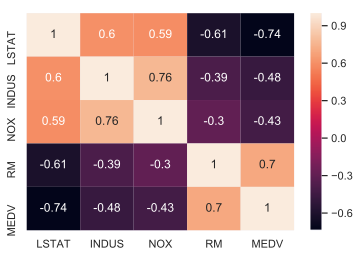

In [63]:
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
hm = sns.heatmap(boston_df[cols].corr(),
                 cbar=True,
                 annot=True)

### Регрессионный анализ
Приступим к построению регрессионной модели. Определим зависимые и независимые переменные:

In [64]:
X = boston_df[['LSTAT']].values
y = boston_df['MEDV'].values

In [65]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)
print('Slope: {:.2f}'.format(slr.coef_[0]))
print('Intercept: {:.2f}'.format(slr.intercept_))

Slope: -0.95
Intercept: 34.55


*PS: эти непонятные символы в фигурных скобках задают вид форматирования строки. В данном случае мы говорим, что хотим вывести число с плавающей точкой с точностью до двух знаков. Подробнее в [Format Specification Mini-Language](https://docs.python.org/3/library/string.html#format-specification-mini-language).*

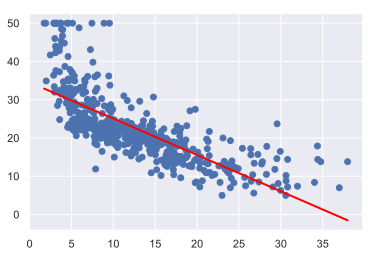

In [66]:
plt.scatter(X, y)
plt.plot(X, slr.predict(X), color='red', linewidth=2);

Для быстрой визуализации линейной зависимости можно также использовать функцию regplot из seaborn.

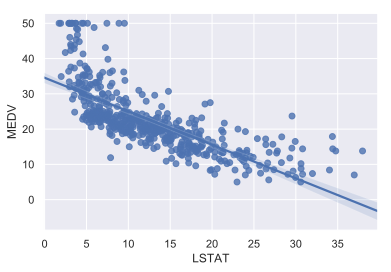

In [68]:
sns.regplot(x="LSTAT", y="MEDV", data=boston_df)

Посчитайте линейную регрессионную модель самостоятельно, используя описанные ранее формулу и библиотеку numpy. Проверьте, совпадают ли коэффициенты с результатами sklearn.

Подсказки:
* «Склеить» два столбца можно при помощи `np.hstack`.
* Для получения обратной матрицы можно использовать `np.linalg.inv`.
* Матричное умножение осуществляет `np.dot`.
* $\vec{w} = \left(X^T X\right)^{-1} X^T \vec{y}$


<script>
function showSolutionNumpyReg() {
    var response = prompt("Введите пароль");

    if (response === "пароль") {
      document.getElementById("solutionNumpyReg").style.display = "block";
    } else alert("Халтурим?")
}
</script>

<button onclick="showSolutionNumpyReg()" class="button">Проверить решение</button>

<div id="solutionNumpyReg" style="display:none;" class="notification is-success">
<pre>
<code class="language-python">
Xb = np.hstack((np.ones((X.shape[0], 1)), X))
w = np.zeros(X.shape[1])
z = np.linalg.inv(np.dot(Xb.T, Xb))
w = np.dot(z, np.dot(Xb.T, y))

print('Slope: {0:.2f}'.format(w[1]))

print('Intercept: {0:.2f}'.format(w[0]))
</code>
</pre>
</div>

### Проверка качество модели: практика
Возможные метрики для проверки качества модели в sklearn можно посмотреть в [документации](http://scikit-learn.org/stable/modules/classes.html#regression-metrics), а можно посчитать самим по формулам. Выберем простой путь.

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [71]:
slr = LinearRegression()

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

Поскольку в нашей модели несколько независимых переменных, мы не можем отобразить их зависимость на двумерном пространстве, но можем нанести на график связь между остатками модели и предсказанными значениями, что также поможет нам диагностировать качество модели. Это называется Residuals plot. C его помощью мы можем увидет нелинейность и выбросы, проверить случайность распределения ошибки.

In [72]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score

print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 37.934, test: 39.817
R^2 train: 0.552, test: 0.522


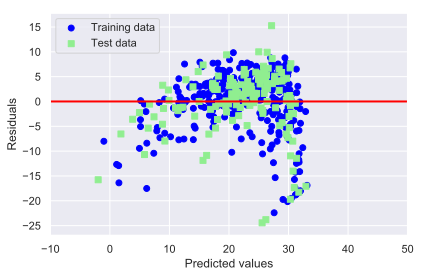

In [73]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.tight_layout()

### Другой взгляд на построение статистических моделей — statsmodels
Statsmodels — ещё одна библиотека для построения статистических данных в Python, но выполненная в лучших традийиях R. Посмотрим, сравним реализацию линейных моделей в sklearn и statsmodels.

In [74]:
from sklearn.linear_model import LinearRegression

slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)
print('Slope: {:.2f}'.format(slr.coef_[0]))
print('Intercept: {:.2f}'.format(slr.intercept_))

Slope: -0.95
Intercept: 34.55


In [75]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

results = smf.ols('MEDV ~ LSTAT', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sat, 23 Mar 2019   Prob (F-statistic):           5.08e-88
Time:                        09:14:53   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
LSTAT         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Регуляризация линейных моделей
#### Переобучение
Регуляризация — это метод для уменьшения степени переобучения модели, а значит, прежде чем мы разберемся, что такое регуляризация, нужно понять суть переобучения (overfitting).
![](./img/overfitting.png)

Переобучение дает неплавные кривые прогнозирования, т. е. «нерегулярные». Такие плохие сложные кривые прогнозирования обычно характеризуются весовыми значениями, которые имеют очень большие или очень малые величины. Поэтому один из способов уменьшить степень переобучения состоит в том, чтобы не допускать очень малых или больших весовых значений для модели. В этом и заключается суть регуляризации.

#### Проблема многомерности: Bias-variance trade-off
https://elitedatascience.com/wp-content/uploads/2017/06/Bias-vs.-Variance-v5.png
![](./img/bvto.png)

Линейная регрессия с большим числом предикторов – комплексная модель и характеризуется:
* Достаточно высоким смещением
* Высокой дисперсией

Чем больше предикторов, тем больше риск переобучения модели. Переобучение также связано с размером коэфициентов.

Переобучение – ситуация, в которой обучающая ошибка продолжает снижаться с повышением сложности модели, а тестовая ошибка растет.

Как с этим бороться?
* Отбор наилучших предикторов
* Снижение размерности предикторов 
* Регуляризация

Регуляризация — это способ уменьшить сложность модели чтобы предотвратить переобучение или исправить некорректно поставленную задачу. Обычно это достигается добавлением некоторой априорной информации к условию задачи. 

В данном случае суть регуляризации состит в том, что мы создаём модель со всеми предикторами, а потом искуственно уменьшаем размер коэффициентов, прибавляя некоторую величину к ошибке.

Ошибка — это то, что минимизируется обучением с помощью одного из примерно десятка численных методов вроде градиентного спуска (gradient descent), итерационного алгоритма Ньютона-Рафсона (iterative Newton-Raphson), L-BFGS, обратного распространения ошибок (back-propagation) и оптимизации роя (swarm optimization).

Чтобы величины весовых значений модели не становились большими, процесс регуляризации штрафует весовые значения добавляя их в вычисление ошибки. Если весовые значения включаются в общую ошибку, которая минимизируется, тогда меньшие весовые значения будут давать меньшие значения ошибки. L1-регуляризация штрафует весовые значения добавлением суммы их абсолютных значений к ошибке.

L2-регуляризация выполняет аналогичную операцию добавлением суммы их квадратов к ошибке. [Сравнение L1 и L2](http://www.chioka.in/differences-between-l1-and-l2-as-loss-function-and-regularization/).

#### Ридж регрессия
Ридж-регрессия или гребневая регрессия (ridge regression) - это один из методов понижения размерности. Часто его применяют для борьбы с переизбыточностью данных, когда независимые переменные коррелируют друг с другом (т.е. имеет место мультиколлинеарность). Следствием этого является плохая обусловленность матрицы $X^T X$ и неустойчивость оценок коэффициентов регрессии. Оценки, например, могут иметь неправильный знак или значения, которые намного превосходят те, которые приемлемы из физических или практических соображений.

Когда мы делаем линейную регрессию, то функция потерь выглядела так:
$$\mathcal{L}\left(X, \vec{y}, \vec{w} \right) = \frac{1}{2n} \sum_{i=1}^n \left(\vec{x_i}^T \vec{w} - y_i\right)^2$$

Пеперь в ридж-регрессии мы добавляем к ней $\lambda\sum_{j=1}^m \left| w_j \right|$, где $\lambda$ обозначает размер штрафа. Если $\lambda = 0$, то это обычная линейная регрессия.

Теперь формула выглядит так: 
$$\Large \mathcal{L}\left(X, \vec{y}, \vec{w} \right) = \frac{1}{2n} \sum_{i=1}^n \left(\vec{x_i}^T \vec{w} - y_i\right)^2 + \lambda \sum_{j=1}^m \left| w_j \right|$$

* Чем меньше $\lambda$, тем выше дисперсия и ниже смещение.

* Чем больше $\lambda$, тем ниже дисперсия и выше смещение.

Взяв производную от этой функции, мы получим формулу, которая не имеет аналитического решения, т.е. МНК не подходит. Следовательно, необходимо использовать градиентный спуск.

#### Лассо регрессия (Least absolute shrinkage and selection operator) 
Очень похожа на ридж регрессию. В ней штраф — это сумма модулей значений коэффициентов.
#### В чем сила ридж и лассо?
• Ридж регрессия снижает размер коэффициентов, а лассо сокращает многие до 0
• Это позволяет снизить размерность (ридж) и выбрать важные предикторы (лассо)
• Работает, когда p > n, где p — число предикторов
• Работает, когда много коллинеарных предикторов
• Обязательно надо делать шкалирование и центрирование, иначе предикторы с высоким стандартным отклонением будут сильно штравоваться.
#### ElasticNet — комбинация L1 и L2 регуляризации в разных пропорциях.

#### Регуляризация в sklearn

In [81]:
from sklearn.preprocessing import StandardScaler


sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y.reshape(-1, 1)).flatten()
# newaxis увеличивает размерность массива, flatten — наооборот
# https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html#numpy.newaxis
# https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.ndarray.flatten.html

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
    X_std, y_std, test_size=0.3, random_state=0)

Проверяем, действительно ли всё шкалировалось:

In [82]:
X_train_scaled.std(), X_train_scaled.mean()

(0.9908156118561137, -0.02977480724160985)

In [83]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train_scaled)
y_train_pred = lasso.predict(X_train_scaled)
y_test_pred = lasso.predict(X_test_scaled)
print(lasso.coef_)

print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train_scaled, y_train_pred),
        mean_squared_error(y_test_scaled, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train_scaled, y_train_pred),
        r2_score(y_test_scaled, y_test_pred)))

[-0.64984726]
MSE train: 0.460, test: 0.473
R^2 train: 0.542, test: 0.520


In [84]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1)
ridge.fit(X_train_scaled, y_train_scaled)
y_train_pred = ridge.predict(X_train_scaled)
y_test_pred = ridge.predict(X_test_scaled)
print(ridge.coef_)

print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train_scaled, y_train_pred),
        mean_squared_error(y_test_scaled, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train_scaled, y_train_pred),
        r2_score(y_test_scaled, y_test_pred)))

[-0.75149352]
MSE train: 0.449, test: 0.472
R^2 train: 0.552, test: 0.522


In [85]:
from sklearn.linear_model import ElasticNet

en = ElasticNet(alpha=0.1, l1_ratio=0.5)
en.fit(X_train_scaled, y_train_scaled)
y_train_pred = en.predict(X_train_scaled)
y_test_pred = en.predict(X_test_scaled)
print(en.coef_)

print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train_scaled, y_train_pred),
        mean_squared_error(y_test_scaled, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train_scaled, y_train_pred),
        r2_score(y_test_scaled, y_test_pred)))

[-0.6668167]
MSE train: 0.456, test: 0.471
R^2 train: 0.545, test: 0.522


### Полиноминальная регрессия
Не всегда аппроксимация в виде прямой линии является наилучшим выходом. Иногда, стоит отказаться от предположения о наличии такой связи и воспользоваться полиноминальной регрессией.

In [86]:
from sklearn.preprocessing import PolynomialFeatures

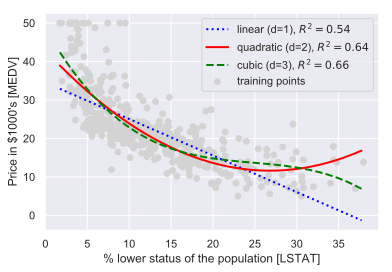

In [87]:
X = df[['LSTAT']].values
y = df['MEDV'].values

regr = LinearRegression()

# create quadratic features
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

# fit features
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]

regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))


# plot results
plt.scatter(X, y, label='training points', color='lightgray')

plt.plot(X_fit, y_lin_fit, 
         label='linear (d=1), $R^2={:.2f}$'.format(linear_r2), 
         color='blue', 
         lw=2, 
         linestyle=':')

plt.plot(X_fit, y_quad_fit, 
         label='quadratic (d=2), $R^2={:.2f}$'.format(quadratic_r2),
         color='red', 
         lw=2,
         linestyle='-')

plt.plot(X_fit, y_cubic_fit, 
         label='cubic (d=3), $R^2={:.2f}$'.format(cubic_r2),
         color='green', 
         lw=2, 
         linestyle='--')

plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.legend(loc='upper right')

Что можно сказать о результатах полиноминальной регрессии? Какую бы модель Вы выбрали?

На мысль о какой функции наводит Вас красный график? Можно ли обойтись без полиномов, одними преобразованиями?

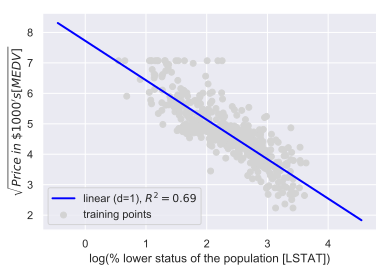

In [88]:
X = df[['LSTAT']].values
y = df['MEDV'].values

# transform features
X_log = np.log(X)
y_sqrt = np.sqrt(y)

# fit features
X_fit = np.arange(X_log.min()-1, X_log.max()+1, 1)[:, np.newaxis]

regr = regr.fit(X_log, y_sqrt)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y_sqrt, regr.predict(X_log))

# plot results
plt.scatter(X_log, y_sqrt, label='training points', color='lightgray')

plt.plot(X_fit, y_lin_fit, 
         label='linear (d=1), $R^2={:.2f}$'.format(linear_r2), 
         color='blue', 
         lw=2)

plt.xlabel('log(% lower status of the population [LSTAT])')
plt.ylabel('$\sqrt{Price \; in \; \$1000\'s [MEDV]}$')
plt.legend(loc='lower left')

Как понять, какое преобразование лучше сделать? Обычно, переменную логарифмируют, когда у неё есть длинный и тонкий хвост. Пример — доход. У большинства людей доход не сильно отличается, но есть очень небольшое количество людей с очень высоким доходом. Логарифмическая функция устроена таким образом, что если применяется к y она штрафует большие значения и вытягивает маленькие. Это можно увидеть из графика:

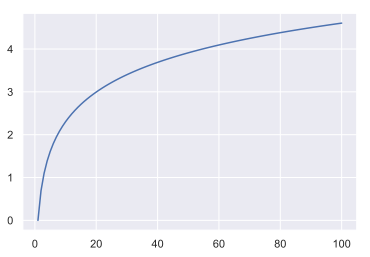

In [90]:
plt.plot(np.arange(1, 101), np.log(np.arange(1, 101)));

А есть ли более формальный критерий, по которому можно понять, как трансформировать переменную?

Есть. Это [степенная трансформация Бокса-Кокса](http://www.machinelearning.ru/wiki/index.php?title=%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%91%D0%BE%D0%BA%D1%81%D0%B0-%D0%9A%D0%BE%D0%BA%D1%81%D0%B0). 

$$y_i^{\lambda} = \begin{cases}\frac{y_i^\lambda-1}{\lambda},&\text{if } \lambda \neq 0,\\ \log{(y_i)},& \text{if } \lambda = 0.\end{cases}$$

Она реализована в библиотеке scipy.

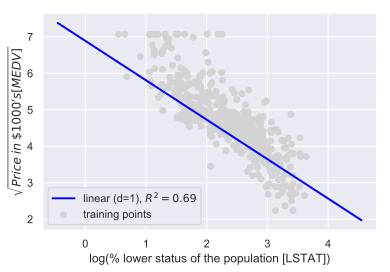

In [91]:
from scipy.stats import boxcox

y_boxcox = boxcox(df['MEDV'].values)[0]

regr = LinearRegression()

regr = regr.fit(X_log, y_boxcox)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y_boxcox, regr.predict(X_log))
plt.scatter(X_log, y_sqrt, label='training points', color='lightgray')

plt.plot(X_fit, y_lin_fit, 
         label='linear (d=1), $R^2={:.2f}$'.format(linear_r2), 
         color='blue', 
         lw=2)

plt.xlabel('log(% lower status of the population [LSTAT])')
plt.ylabel('$\sqrt{Price \; in \; \$1000\'s [MEDV]}$')
plt.legend(loc='lower left')

## Использование категориальных переменных в качестве предикторов
### Label Encoding
 Самый простой и очевидный способ перекодировки — просто заменить строки на числа. В модуле preprocessing библиотеки sklearn именно для этой задачи реализован класс [LabelEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html).

In [92]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(["paris", "paris", "tokyo", "amsterdam"])
le.transform(["tokyo", "tokyo", "paris"]) 

array([2, 2, 1])

Метод fit этого класса находит все уникальные значения и строит таблицу для соответствия каждой категории некоторому числу, а метод transform непосредственно преобразует значения в числа. После fit у label_encoder будет доступно поле classes_, содержащее все уникальные значения. Можно их пронумеровать и убедиться, что преобразование выполнено верно.

При использовании этого подхода мы всегда должны быть уверены, что признак не может принимать неизвестных ранее значений, иначе вылезет ошибка.

Однако, такое представление имеет мало смысла и, более того, не корректно, поскольку таким образом мы определяем для этой переменной недопустимые математические операции.


### One-Hot Encoding
Предположим, что некоторый признак может принимать 10 разных значений. В этом случае One Hot Encoding подразумевает создание 10 признаков, все из которых равны нулю за исключением одного. На позицию, соответствующую численному значению признака мы помещаем 1.

Эта техника реализована в sklearn.preprocessing в классе OneHotEncoder. По умолчанию OneHotEncoder преобразует данные в разреженную матрицу, чтобы не расходовать память на хранение многочисленных нулей. Однако в этом примере размер данных не является для нас проблемой, поэтому мы будем использовать "плотное" представление.

In [128]:
cars_df = pd.DataFrame({"car": ["BMW", "Audi", "BMW", "Mersedes"],
                        "retailer": ["Best cars ever", "Best cars ever", "Best cars ever", "AutoMoto"]})
cars_df

,car,retailer
0,BMW,Best cars ever
1,Audi,Best cars ever
2,BMW,Best cars ever
3,Mersedes,AutoMoto


In [129]:
pd.get_dummies(cars_df)

,car_Audi,car_BMW,car_Mersedes,retailer_AutoMoto,retailer_Best cars ever
0,0,1,0,0,1
1,1,0,0,0,1
2,0,1,0,0,1
3,0,0,1,1,0


Можно использовать модуль [OneHotEncoder из SkLearn](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html), но с ним не так всё просто — необходимо сначала преобразовать значения в числа как в label encoding. Проще использовать [LabelBinarizer](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html#sklearn.preprocessing.LabelBinarizer):

In [133]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
lb.fit_transform(cars_df["car"])

array([[0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

### Hashing trick
Для очень больших данных со множеством уникальных признаков, на этом курсе не пригодится.
Подробнее для самостоятельного ознакомления:
* [Jun Wang, Wei Liu, Sanjiv Kumar, Shih-Fu Chang. Learning to Hash for Indexing Big Data - A Survey](https://arxiv.org/abs/1509.05472)
* [Открытый курс машинного обучения.](https://habrahabr.ru/company/ods/blog/326418/#heshirovanie-priznakov-hashing-trick)


### Пример работы с категориальными данными
Пусть это будут данные о престиже различных профессий в США.

In [147]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

duncan_prestige = sm.datasets.get_rdataset("Duncan", "car")

In [148]:
print(duncan_prestige.__doc__)

+----------+-------------------+
| Duncan   | R Documentation   |
+----------+-------------------+

Duncan's Occupational Prestige Data
-----------------------------------

Description
~~~~~~~~~~~

The ``Duncan`` data frame has 45 rows and 4 columns. Data on the
prestige and other characteristics of 45 U. S. occupations in 1950.

Usage
~~~~~

::

    Duncan

Format
~~~~~~

This data frame contains the following columns:

type
    Type of occupation. A factor with the following levels: ``prof``,
    professional and managerial; ``wc``, white-collar; ``bc``,
    blue-collar.

income
    Percent of males in occupation earning $3500 or more in 1950.

education
    Percent of males in occupation in 1950 who were high-school
    graduates.

prestige
    Percent of raters in NORC study rating occupation as excellent or
    good in prestige.

Source
~~~~~~

Duncan, O. D. (1961) A socioeconomic index for all occupations. In
Reiss, A. J., Jr. (Ed.) *Occupations and Social Status.* Free Press
[Ta

In [149]:
duncan_prestige.data.head(5)

,type,income,education,prestige
accountant,prof,62,86,82
pilot,prof,72,76,83
architect,prof,75,92,90
author,prof,55,90,76
chemist,prof,64,86,90


In [152]:
prestige_df = duncan_prestige.data.copy()
prestige_dummies = pd.get_dummies(prestige_df.select_dtypes(include=[object]))
prestige_df = pd.concat([prestige_df, prestige_dummies], axis=1)

In [159]:
prestige_df.head()

,type,income,education,prestige,type_bc,type_prof,type_wc
accountant,prof,62,86,82,0,1,0
pilot,prof,72,76,83,0,1,0
architect,prof,75,92,90,0,1,0
author,prof,55,90,76,0,1,0
chemist,prof,64,86,90,0,1,0


In [175]:
from sklearn.linear_model import LinearRegression

X_prestige = prestige_df.drop(["type", "prestige"], axis=1).values
y_prestige = prestige_df['prestige'].values

X_train_prestige, X_test_prestige, y_train_prestige, y_test_prestige = train_test_split(
    X_prestige, y_prestige, test_size=0.3, random_state=0)

slr_prestige = LinearRegression()
slr_prestige.fit(X_train_prestige, y_train_prestige)

y_train_pred = slr_prestige.predict(X_train_prestige)
y_test_pred = slr_prestige.predict(X_test_prestige)

print('Slope: {}'.format(slr_prestige.coef_))
print('Intercept: {:.2f}'.format(slr_prestige.intercept_))

Slope: [  0.56397932   0.32027185  -2.14826104  18.72771436 -16.57945333]
Intercept: 2.74


Похожую вещь можно сделать с помощью statsmodels, и про том гораздо проще:

In [176]:
results = smf.ols('prestige ~ education + income + C(type)', data=prestige_df).fit()

In [177]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               prestige   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     105.0
Date:                Fri, 03 Nov 2017   Prob (F-statistic):           1.17e-20
Time:                        14:56:00   Log-Likelihood:                -163.65
No. Observations:                  45   AIC:                             337.3
Df Residuals:                      40   BIC:                             346.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.1850      3.714     -0.050      0.961      -7.691       7.321
C(type)[T.prof]    16.6575      6.993      2.382      0.022       2.524      30.791
C(type)[T.wc]     -14.6611      6.109     -2.400      0.021     -27.007      -2.315
education           0.3453      0.114      3.040      0.004       0.116       0.575
income              0.5975      0.089      6.687      0.000       0.417       0.778
==============================================================================
Omnibus:                       10.720   Durbin-Watson:                   1.497
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               10.285
Skew:                           1.013   Prob(JB):                      0.00584
Kurtosis:                       4.176   Cond. No.                         462.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Самостоятельная

Ваша задача — проанализировать результаты [European Social Survey шестой волны](http://www.europeansocialsurvey.org/data/download.html?r=6) или [World Values Survey](http://www.worldvaluessurvey.org/wvs.jsp). ESS — это сравнительное межстрановое трендовое исследование установок, взглядов, ценностей и поведения населения Европы, которое проводится почти во всех европейских странах каждые два года, начиная с 2002, методом опроса населения 15 лет и старше по случайной репрезентативной выборке населения в каждой стране с помощью личных интервью на дому у респондентов. WVS — тоже весьма похожий исследовательский проект, объединяющий социологов по всему миру, которые изучают ценности и их воздействие на социальную и культурную жизнь. WVS провёл социологические исследования уже в 97 странах.

Продемонструйте навыки использования регресси на этих данных:
* самостоятельно поставьте исследовательскую задачу, определите зависимую и независимые переменные;
* визуализируйте эффекты модели и дайте им интерпретацию.

Описание всех переменных из ESS доступно в [протоколе исследования](http://www.europeansocialsurvey.org/docs/round6/survey/ESS6_data_protocol_e01_4.pdf), сами данные можно скачать по [ссылке](https://drive.google.com/file/d/0B-JqczPqzcEZbUtCcnFOWWM3LUU/view?usp=sharing). Для переменных из WVS также есть описание [на сайте](http://www.worldvaluessurvey.org/WVSDocumentationWV6.jsp) (раздел "Questionnaire") и [данные](https://www.dropbox.com/s/q6a07fwdr80brnb/WV6_Data_spss_v_2015_04_18.sav?dl=0).

In [ ]:
import pyreadstat

# Download data https://nagornyy.me/datasets/ESS6/ESS6.sav.zip
ess, _ = pyreadstat.read_sav('ESS6.sav')
ess_ru = ess[ess.cntry == "RU"][["agea", "hinctnta", "eduyrs", "gndr", "fairelc", "meprinf"]]
ess_ru.head()